In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터 둘러보기

In [2]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [5]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# 이상치 제거

In [6]:
# 주택의 평가는 낮은데 가격은 비싼 데이터 제거
train.drop(train[(train['OverallQual'] < 4) & (train['SalePrice'] > 180000)].index, inplace=True)
train.drop(train[(train['OverallCond'] < 4) & (train['SalePrice'] > 180000)].index, inplace=True)

train.reset_index(drop=True, inplace=True)
print(train.shape)

(1457, 81)


# 종속 변수의 로그 변환

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

The value of mu before log transformation is: 180750.09608785174
The value of sigma before log transformation is: 79296.99301649569


/var/folders/h4/qkygjbx150l41hr_cmr5wpt80000gn/T/ipykernel_25701/1736778157.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


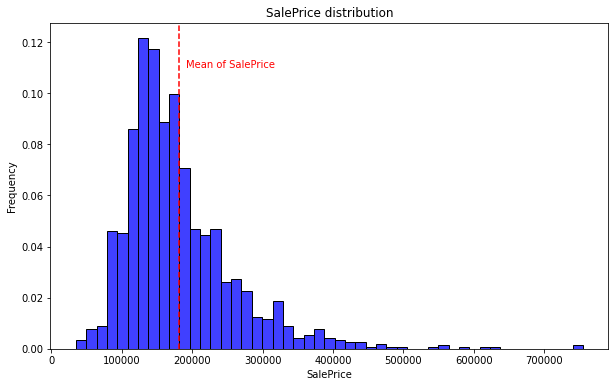

In [8]:
# 로그 변환 이전의 SalePrice
# mu(μ): 모평균, sigma(σ) = 모표준편차
(mu, sigma) = norm.fit(train['SalePrice'])
print('The value of mu before log transformation is:', mu)
print('The value of sigma before log transformation is:', sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color='b', stat='probability')
ax.xaxis.grid(False)
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = 'SalePrice distribution')

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu+10000, 0.11, 'Mean of SalePrice', rotation=0, color='r')
fig.show()

The value of mu after log transformation is: 12.023224732432771
The value of sigma after log transformation is: 0.39903187298356657


/var/folders/h4/qkygjbx150l41hr_cmr5wpt80000gn/T/ipykernel_25701/613423912.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


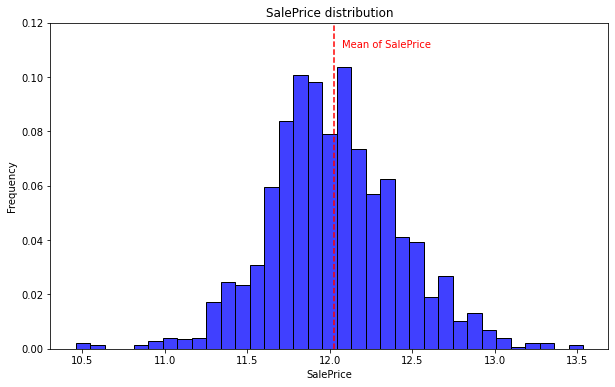

In [9]:
import numpy as np
# 위에서 데이터는 정규 분포를 이루지 않는 것을 확인할 수 있음. 일반적인 선형 회귀는 정규분포를 만족해야 해서 SalePrice를 로그 변환함.
train['SalePrice'] = np.log1p(train['SalePrice'])


(mu, sigma) = norm.fit(train['SalePrice'])
print('The value of mu after log transformation is:', mu)
print('The value of sigma after log transformation is:', sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color='b', stat='probability')
ax.xaxis.grid(False)
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = 'SalePrice distribution')

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu+0.05, 0.111, 'Mean of SalePrice', rotation=0, color='r')
plt.ylim(0, 0.12)
fig.show()

# 데이터 합치기

In [10]:
# train set과 test set을 합치기 전에 Id는 별도로 저장한 뒤에 삭제
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1457, 80), (1459, 79))

In [11]:
# SalePrice도 별도로 저장한 뒤에 삭제
y = train['SalePrice'].reset_index(drop=True)
train=train.drop('SalePrice', axis=1)
train.shape, test.shape, y.shape

((1457, 79), (1459, 79), (1457,))

In [12]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df.shape

(2916, 79)

# 결측치 처리

In [13]:
def check_na(data, head_num):
    isnull_na=(data.isnull().sum() / len(data)) * 100
    data_na=isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending = False)
    missing_data = pd.DataFrame({'Missing Ratio': data_na,
                                 'Data Type': data.dtypes[data_na.index]})
    print("<결측치 데이터 컬럼과 비율>\n\n", missing_data.head(head_num))

check_na(all_df, 100)

<결측치 데이터 컬럼과 비율>

               Missing Ratio Data Type
PoolQC            99.657064    object
MiscFeature       96.399177    object
Alley             93.209877    object
Fence             80.418381    object
FireplaceQu       48.696845    object
LotFrontage       16.632373   float64
GarageFinish       5.452675    object
GarageQual         5.452675    object
GarageCond         5.452675    object
GarageYrBlt        5.452675   float64
GarageType         5.384088    object
BsmtExposure       2.812071    object
BsmtCond           2.812071    object
BsmtQual           2.777778    object
BsmtFinType2       2.743484    object
BsmtFinType1       2.709191    object
MasVnrType         0.788752    object
MasVnrArea         0.754458   float64
MSZoning           0.137174    object
BsmtFullBath       0.068587   float64
BsmtHalfBath       0.068587   float64
Functional         0.068587    object
Utilities          0.068587    object
GarageArea         0.034294   float64
GarageCars         0.034294   f

In [14]:
# 결측치 상위 6개 제거

all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)

check_na(all_df, 100)

<결측치 데이터 컬럼과 비율>

               Missing Ratio Data Type
GarageCond         5.452675    object
GarageQual         5.452675    object
GarageYrBlt        5.452675   float64
GarageFinish       5.452675    object
GarageType         5.384088    object
BsmtCond           2.812071    object
BsmtExposure       2.812071    object
BsmtQual           2.777778    object
BsmtFinType2       2.743484    object
BsmtFinType1       2.709191    object
MasVnrType         0.788752    object
MasVnrArea         0.754458   float64
MSZoning           0.137174    object
Functional         0.068587    object
Utilities          0.068587    object
BsmtFullBath       0.068587   float64
BsmtHalfBath       0.068587   float64
GarageArea         0.034294   float64
GarageCars         0.034294   float64
TotalBsmtSF        0.034294   float64
KitchenQual        0.034294    object
Electrical         0.034294    object
BsmtUnfSF          0.034294   float64
BsmtFinSF2         0.034294   float64
BsmtFinSF1         0.034294   f

In [15]:
# 결측치 데이터 처리 - 문자열 데이터
# 결측치를 빈도수 제일 높은 값으로 채움

cat_all_vars = train.select_dtypes(exclude=[np.number])
print('The whole number of cat_all_vars', len(list(cat_all_vars)))

final_cat_vars=[]
for v in cat_all_vars:
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']:
        final_cat_vars.append(v)
print('The whole number of final_cat_vars', len(final_cat_vars))

for i in final_cat_vars:
    all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

The whole number of cat_all_vars 43
The whole number of final_cat_vars 38


In [16]:
check_na(all_df, 100)

<결측치 데이터 컬럼과 비율>

               Missing Ratio Data Type
GarageYrBlt        5.452675   float64
MasVnrArea         0.754458   float64
BsmtFullBath       0.068587   float64
BsmtHalfBath       0.068587   float64
BsmtFinSF1         0.034294   float64
BsmtFinSF2         0.034294   float64
BsmtUnfSF          0.034294   float64
TotalBsmtSF        0.034294   float64
GarageCars         0.034294   float64
GarageArea         0.034294   float64


In [17]:
# 결측치 데이터 처리 - 수치형 데이터
# 결측치를 중간값으로 채움

num_all_vars = list(train.select_dtypes(include=[np.number]))
num_all_vars.remove('LotFrontage')
print('The whole number of num_all_vars', len(num_all_vars))

for i in num_all_vars:
    all_df[i].fillna(value = all_df[i].median(), inplace=True)

The whole number of num_all_vars 35


In [18]:
check_na(all_df, 100)

<결측치 데이터 컬럼과 비율>

 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


# 왜도(skewness) 값 처리

In [19]:
# 왜도: 비대칭도 -> 정규분포: 왜도 = 0
# positive skew: 왼쪽으로 치우침
from scipy.stats import skew

def find_skew(x):
    return skew(x)

skew_fetures = all_df[num_all_vars].apply(find_skew).sort_values(ascending=False)
skew_fetures

MiscVal          21.935910
PoolArea         16.889551
LotArea          12.869017
LowQualFinSF     12.334533
3SsnPorch        11.370087
KitchenAbvGr      4.318067
BsmtFinSF2        4.143683
EnclosedPorch     4.012966
ScreenPorch       3.944305
BsmtHalfBath      3.929197
MasVnrArea        2.615177
OpenPorchSF       2.534191
WoodDeckSF        1.841997
1stFlrSF          1.471469
BsmtFinSF1        1.429202
MSSubClass        1.375021
GrLivArea         1.270664
TotalBsmtSF       1.164943
BsmtUnfSF         0.919266
2ndFlrSF          0.861877
TotRmsAbvGrd      0.753565
Fireplaces        0.734820
HalfBath          0.696122
BsmtFullBath      0.627685
OverallCond       0.587976
BedroomAbvGr      0.327263
GarageArea        0.242356
OverallQual       0.197095
MoSold            0.195818
FullBath          0.164891
YrSold            0.132843
GarageCars       -0.217977
GarageYrBlt      -0.398590
YearRemodAdd     -0.451687
YearBuilt        -0.600881
dtype: float64

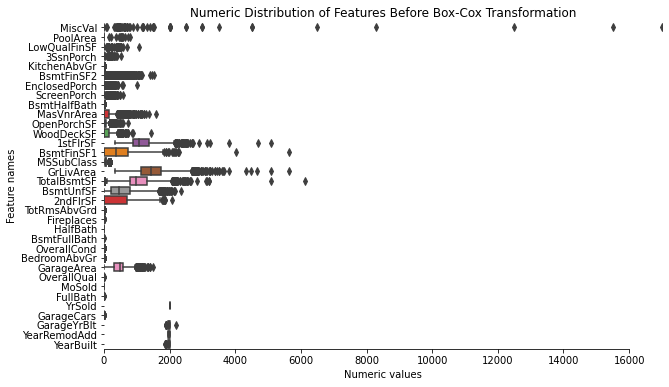

In [20]:
skewness_index = list(skew_fetures.index)
skewness_index.remove('LotArea')
# skewness_index.remove('MiscVal')
all_numeric_df = all_df.loc[:, skewness_index]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, all_numeric_df.max().sort_values(ascending=False)[0])
ax = sns.boxplot(data=all_numeric_df[skewness_index], orient='h', palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel='Feature names')
ax.set(xlabel='Numeric values')
ax.set(title='Numeric Distribution of Features Before Box-Cox Transformation')

sns.despine(trim=True, left=True)

In [21]:
# Box-Cox Transformation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_fetures[skew_fetures > 1]
high_skew_index = high_skew.index
print('The data before Box-Cox Transformation:\n', all_df[high_skew_index].head())

for num_var in high_skew_index:
    all_df[num_var] = boxcox1p(all_df[num_var], boxcox_normmax(all_df[num_var]+1))

print('The data after Box-Cox Transformation:\n', all_df[high_skew_index].head())

The data before Box-Cox Transformation:
    MiscVal  PoolArea  LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0        0         0     8450             0          0             1   
1        0         0     9600             0          0             1   
2        0         0    11250             0          0             1   
3        0         0     9550             0          0             1   
4        0         0    14260             0          0             1   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0         0.0              0            0           0.0       196.0   
1         0.0              0            0           1.0         0.0   
2         0.0              0            0           0.0       162.0   
3         0.0            272            0           0.0         0.0   
4         0.0              0            0           0.0       350.0   

   OpenPorchSF  WoodDeckSF  1stFlrSF  BsmtFinSF1  MSSubClass  GrLivArea  \
0           61          

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


The data after Box-Cox Transformation:
    MiscVal  PoolArea    LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0      0.0       0.0  13.443589           0.0        0.0      0.751169   
1      0.0       0.0  13.714284           0.0        0.0      0.751169   
2      0.0       0.0  14.054769           0.0        0.0      0.751169   
3      0.0       0.0  13.703149           0.0        0.0      0.751169   
4      0.0       0.0  14.572142           0.0        0.0      0.751169   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0         0.0       0.000000          0.0      0.000000   19.359930   
1         0.0       0.000000          0.0      0.710938    0.000000   
2         0.0       0.000000          0.0      0.000000   17.704775   
3         0.0      15.973434          0.0      0.000000    0.000000   
4         0.0       0.000000          0.0      0.000000   25.295496   

   OpenPorchSF  WoodDeckSF  1stFlrSF  BsmtFinSF1  MSSubClass  GrLivArea  \
0    12.00839

# 도출 변수 생성

In [22]:
# 주어진 변수들을 이용해 새로운 변수 도출하기

# 집의 전체 크기라는 변수 만들기(세개의 변수를 합쳐서) -> 사용된 세개의 변수는 지우기
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)

print(all_df.shape)

(2916, 74)


In [23]:
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath'])
                             + all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))

all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch']
                            + all_df['EnclosedPorch'] + all_df['ScreenPorch'])

all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
                     'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)

print(all_df.shape)

(2916, 68)


In [24]:
# 연도와 관련된 변수
num_all_vars = list(train.select_dtypes(include=[np.number]))
year_feature=[]
for v in num_all_vars:
    if 'Yr' in v:
        year_feature.append(v)
    elif 'Year' in v:
        year_feature.append(v)

print(year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


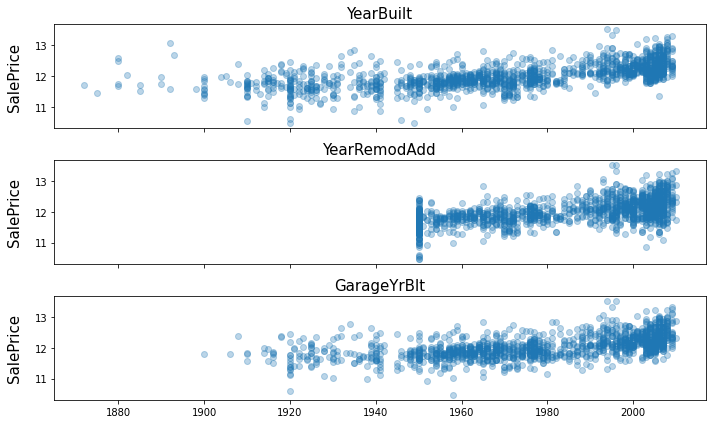

In [25]:
# 위에서 구한 날짜와 관련된 데이터와 SalePrice를 연관 지어 시각화함.

fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)

for i, v in enumerate(year_feature):
    if v != 'YrSold':
        ax[i].scatter(train[v], y, alpha=0.3)
        ax[i].set_title('{}'.format(v), size=15)
        ax[i].set_ylabel('SalePrice', size=15, labelpad=12.5)

plt.tight_layout()
plt.show()

# 변수 이름은 다르지만 2000년대로 올수록 SalePrice가 우상향함.

In [26]:
all_df=all_df.drop(['YearBuilt', 'GarageYrBlt'], axis=1)
print(all_df.shape)

(2916, 66)


/var/folders/h4/qkygjbx150l41hr_cmr5wpt80000gn/T/ipykernel_25701/1801100485.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


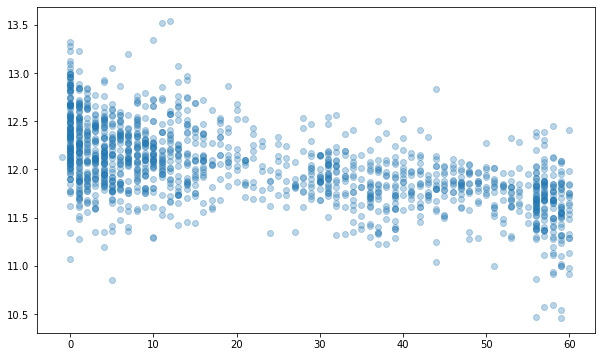

In [27]:
# YrSold와 YearRemodAdd 연도 차이로 변수 생성 -> SalePrice와의 관계 시각화.
YearsSinceRemodel = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(YearsSinceRemodel, y, alpha=0.3)
fig.show()

In [28]:
all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df=all_df.drop(['YrSold', 'YearRemodAdd'], axis=1)
print(all_df.shape)

(2916, 65)


# 더미 변수의 응용

In [29]:
# 범주형 데이터를 수치형으로 바꾸기
# 예시: 남, 여 -> 1, 2

all_df['PoolArea'].value_counts()

0.000000    2903
5.843475       1
6.048859       1
5.946285       1
5.913892       1
5.787041       1
5.855340       1
6.161842       1
4.722126       1
5.553975       1
5.718777       1
5.131173       1
5.923273       1
6.231775       1
Name: PoolArea, dtype: int64

In [30]:
# 위 변수는 0보다 크면 1로 처리해서 0과 1로 단순화

def count_dummy(x):
    if x > 0:
        return 1
    else:
        return 0

all_df['PoolArea'] = all_df['PoolArea'].apply(count_dummy)
all_df['PoolArea'].value_counts()

0    2903
1      13
Name: PoolArea, dtype: int64

In [31]:
all_df['GarageArea'] = all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

1    2759
0     157
Name: GarageArea, dtype: int64

In [32]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()

1    1496
0    1420
Name: Fireplaces, dtype: int64

# Label Encoding, Ordinal Encoding, One-Hot Encoding

In [33]:
# 값이 3개 이상이면?

all_df = pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape

(2916, 261)

# 머신러닝 모형 학습 및 평가

In [34]:
X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

((1457, 261), (1457,), (1459, 261))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1019, 261), (438, 261), (1019,), (438,))

In [36]:
print(X.describe())
print(max(X.std()))

        MSSubClass      LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1457.000000  1457.000000  1457.000000  1457.000000  1457.000000   
mean      5.944616    13.609812     6.096774     5.581332     8.189216   
std       1.564834     1.097408     1.382126     1.105870    10.994660   
min       4.249343     9.784491     1.000000     1.000000     0.000000   
25%       4.249343    13.204261     5.000000     5.000000     0.000000   
50%       6.085499    13.685897     6.000000     5.000000     0.000000   
75%       6.861719    14.121055     7.000000     6.000000    17.807420   
max       9.529497    21.277458    10.000000     9.000000    49.799595   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1457.000000  1457.000000  1457.000000  1457.000000  1457.000000  ...   
mean     72.296376     1.117202   567.359643   344.680587     5.497075  ...   
std      62.773188     3.183891   442.199881   118.501033     0.190766  ...   
min       0.00000

In [37]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=4, shuffle=True)

# 회귀 모형 평가 지표

In [38]:
from sklearn.metrics import mean_squared_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 모형 정의, 학습, 검증 평가

### Linear Regression ###

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def cv_rmse(model, n_folds):
    cv = KFold(n_splits=n_folds, random_state=4, shuffle=True)
    rmse_list = np.sqrt(-cross_val_score(lr_model, X, y, scoring='neg_mean_squared_error', cv=cv))
    print('CV RMSE value list: ', np.round(rmse_list, 4))
    print('CV RMSE mean value: ', np.round(np.mean(rmse_list), 4))
    return rmse_list

n_folds = 5
rmse_scores = {}
lr_model = LinearRegression()

score = cv_rmse(lr_model, n_folds)
print('linear regression-mean: {:.4f} (std: {:.4f})'.format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())

CV RMSE value list:  [ 441.0571 4230.3554 1917.6431 4578.0567 4845.1635]
CV RMSE mean value:  3202.4551
linear regression-mean: 3202.4551 (std: 1727.6233)


# 다시 !!

In [75]:
from sklearn.model_selection import cross_val_predict

X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]

lr_model_fit = lr_model.fit(X, y)
final_pred = np.floor(np.expm1(lr_model_fit.predict(X_test)))
for i in range(len(final_pred)):
    if final_pred[i] > 9999999999:
        final_pred[i] = final_pred[i-1]
    if final_pred[i] < 0:
        final_pred[i] = final_pred[i-1]

/var/folders/h4/qkygjbx150l41hr_cmr5wpt80000gn/T/ipykernel_25701/2562563179.py:7: RuntimeWarning: overflow encountered in expm1
  final_pred = np.floor(np.expm1(lr_model_fit.predict(X_test)))


In [76]:
submission = pd.read_csv('sample_submission.csv')
submission.iloc[:, 1] = final_pred
print(submission)
submission.to_csv('The_first_regression.csv', index=False)

        Id  SalePrice
0     1461   116860.0
1     1462   157915.0
2     1463   187958.0
3     1464   197374.0
4     1465   200082.0
...    ...        ...
1454  2915    83235.0
1455  2916    80767.0
1456  2917   175214.0
1457  2918   115855.0
1458  2919   217784.0

[1459 rows x 2 columns]
